# compile and run the Mie code in Colab

install gfortran compiler and netCDF library needed to compile the fortran code

In [ ]:
!apt-get install gfortran g++ gcc libnetcdf-dev libnetcdff-dev vim tmux &> /dev/null

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

Mount Google Drive

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


## Compile and run the Mie code

Check the netCDF configurations
use the information with "--libs" in the Makefile of Mie code

In [ ]:
!nc-config --all


This netCDF 4.6.0 has been built with the following features: 

  --cc        -> /usr/bin/cc
  --cflags    -> -I/usr/include -I/usr/include/hdf5/serial
  --libs      -> -L/usr/lib/x86_64-linux-gnu -L/usr/lib/x86_64-linux-gnu/hdf5/serial -lnetcdf -lhdf5_hl -lhdf5 -lpthread -lsz -lz -ldl -lm -lcurl

  --has-c++   -> no
  --cxx       -> 

  --has-c++4  -> no
  --cxx4      -> 

  --has-fortran-> yes
  --fc        -> gfortran
  --fflags    -> -I/usr/include
  --flibs     -> -L/usr/lib -lnetcdff -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,now -lnetcdf -lnetcdf
  --has-f90   -> no
  --has-f03   -> yes

  --has-dap   -> yes
  --has-dap2  -> yes
  --has-dap4  -> yes
  --has-nc2   -> yes
  --has-nc4   -> yes
  --has-hdf5  -> yes
  --has-hdf4  -> no
  --has-logging-> no
  --has-pnetcdf-> no
  --has-szlib -> no
  --has-cdf5 -> no
  --has-parallel-> no

  --prefix    -> /usr
  --includedir-> /usr/include
  --libdir    -> /usr/lib/x86_64-linux-gnu
  --version   -> netCDF 4.6.0



In [ ]:
!ls /content/drive/Shareddrives/


ZZhang_Teaching


 Go the folder of Mie Code and Compile it

In [ ]:
%cd /content/drive/Shareddrives/ZZhang_Teaching/Codes/Mie_code
!make

/content/drive/Shareddrives/ZZhang_Teaching/Codes/Mie_code
gfortran -O2 -g -o mie_single_size.exe mie_single_size.f90 MIEV0.o RDI1MACHmodule.o  ErrPack.o write_data.o -I/usr/include -L/usr/lib -lnetcdff -Wl,-Bsymbolic-functions -Wl,-z,relro -Wl,-z,now -lnetcdf -lnetcdf
gfortran -O2 -g -o mie_single_size_driver.exe driver.f90 gamma_size.o REFWAT.o


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.integrate as integrate
from scipy.interpolate import interp1d
from scipy.special import legendre
from netCDF4 import Dataset
import sys
from netCDF4 import Dataset

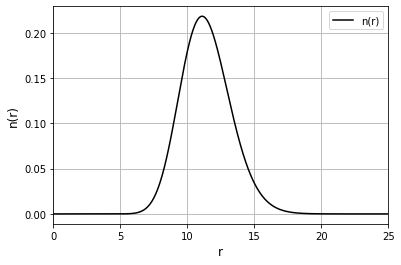

In [ ]:
#First plot
r= np.linspace(0.05,25,1000)  ### perturbed radius in microns
r_e=12
v_e=0.025

denom= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e*v_e))

N_0= 1/integrate.simps(denom,r)
###print(N_0)



n_r1= N_0* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e*v_e))

fig,ax=plt.subplots()
ax.plot(r,n_r1,label='n(r)',color='black')
ax.set_xlabel('r',fontsize='large')
ax.set_ylabel('n(r)',fontsize='large')
ax.set_xlim(0,25)
plt.legend()
ax.grid(True)

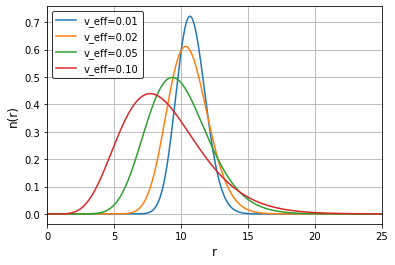

In [ ]:
#Second plot
r= np.linspace(0.05,25,1000)  ### perturbed radius in microns
r_e=11
v_e1=0.01
v_e2=0.02
v_e3=0.05
v_e4=0.10

denom1= (r**((1-3*v_e1)/v_e1))*np.exp((-r)/(r_e*v_e1))
denom2= (r**((1-3*v_e2)/v_e2))*np.exp((-r)/(r_e*v_e2))
denom3= (r**((1-3*v_e3)/v_e3))*np.exp((-r)/(r_e*v_e3))
denom4= (r**((1-3*v_e4)/v_e4))*np.exp((-r)/(r_e*v_e4))

#int_psi_square = scipy.integrate.simps(abs(psi) ** 2, x)
#return psi/np.sqrt(int_psi_square)

#N_01= 1/integrate.simps(denom1,r)
#N_02= 1/integrate.simps(denom2,r)
#N_03= 1/integrate.simps(denom3,r)
#N_04= 1/integrate.simps(denom4,r)

N_01= 1/np.sqrt(integrate.simps(abs(denom1)**2,r))
N_02= 1/np.sqrt(integrate.simps(abs(denom2)**2,r))
N_03= 1/np.sqrt(integrate.simps(abs(denom3)**2,r))
N_04= 1/np.sqrt(integrate.simps(abs(denom4)**2,r))



n_r1= N_01* (r**((1-3*v_e1)/v_e1))*np.exp((-r)/(r_e*v_e1))
n_r2= N_02* (r**((1-3*v_e2)/v_e2))*np.exp((-r)/(r_e*v_e2))
n_r3= N_03* (r**((1-3*v_e3)/v_e3))*np.exp((-r)/(r_e*v_e3))
n_r4= N_04* (r**((1-3*v_e4)/v_e4))*np.exp((-r)/(r_e*v_e4))

fig,ax=plt.subplots()
ax.plot(r,n_r1,label='v_eff=0.01')
ax.plot(r,n_r2,label='v_eff=0.02')
ax.plot(r,n_r3,label='v_eff=0.05')
ax.plot(r,n_r4,label='v_eff=0.10')
ax.set_xlabel('r',fontsize='large')
ax.set_ylabel('n(r)',fontsize='large')
ax.set_xlim(0,25)
plt.legend(loc='upper left', edgecolor='black')
ax.grid(True)

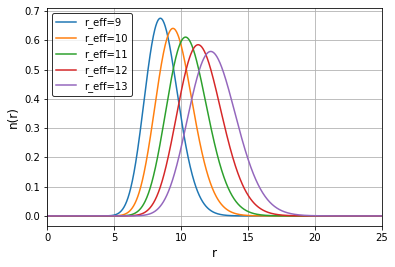

In [ ]:
#Third plot
r= np.linspace(0.05,25,1000)  ### perturbed radius in microns
v_e=0.02
r_e1=9
r_e2=10
r_e3=11
r_e4=12
r_e5=13

denom1= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e1*v_e))
denom2= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e2*v_e))
denom3= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e3*v_e))
denom4= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e4*v_e))
denom5= (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e5*v_e))

N_01= 1/np.sqrt(integrate.simps(abs(denom1)**2,r))
N_02= 1/np.sqrt(integrate.simps(abs(denom2)**2,r))
N_03= 1/np.sqrt(integrate.simps(abs(denom3)**2,r))
N_04= 1/np.sqrt(integrate.simps(abs(denom4)**2,r))
N_05= 1/np.sqrt(integrate.simps(abs(denom5)**2,r))



n_r1= N_01* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e1*v_e))
n_r2= N_02* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e2*v_e))
n_r3= N_03* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e3*v_e))
n_r4= N_04* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e4*v_e))
n_r5= N_05* (r**((1-3*v_e)/v_e))*np.exp((-r)/(r_e5*v_e))

fig,ax=plt.subplots()
ax.plot(r,n_r1,label='r_eff=9')
ax.plot(r,n_r2,label='r_eff=10')
ax.plot(r,n_r3,label='r_eff=11')
ax.plot(r,n_r4,label='r_eff=12')
ax.plot(r,n_r5,label='r_eff=13')
ax.set_xlabel('r',fontsize='large')
ax.set_ylabel('n(r)',fontsize='large')
ax.set_xlim(0,25)
plt.legend(loc='upper left', edgecolor='black')
ax.grid(True)

## Mie code for single spherical particle
The Fortran core of Mie code "MIEV0.f" is developed by Wiscombe (1980). I added the fortran wrapper to the Mie code, which takes three files as input

1) filename.dat: specifies the name of output netCDF file <br>
2) size.dat: specifies the **diameter** of the sphere <br>
3) wl_ref.dat: specifies the wavelength and corresponding refractive index <br>



W. J. Wiscombe, "Improved Mie scattering algorithms," Appl. Opt. 19, 1505-1509 (1980)




In [ ]:
def write_mie_inputs():
  with open("filename.dat",'w') as f:
    f.write("Mie_Code_outputx.nc")
  nwl = 2
  wl = [0.5, 11]
  nr = [1.4, 1.3]
  ni = [1e-9, 1e-6]
  with open("wl_ref.dat",'w') as f:
    f.write('{0:2d} \n'.format(nwl))
    for i in range(nwl):
      f.write('{0:5.3f} {1:5.3f} {2:5.3e} \n'.format(wl[i],nr[i],ni[i]))
  nD = 1000
  r=np.linspace(0.05,25,1000)
  D=2*r
  ####D=np.logspace(-1,2,nD)
  with open("size.dat",'w') as f:
    f.write('{:5d} \n'.format(nD))
    for i in range(nD):
      f.write('{0:7.3f} \n'.format(D[i]))

write_mie_inputs()


In [ ]:
!head filename.dat wl_ref.dat size.dat

==> filename.dat <==
Mie_Code_outputx.nc
==> wl_ref.dat <==
 2 
0.500 1.400 1.000e-09 
11.000 1.300 1.000e-06 

==> size.dat <==
 1000 
  0.100 
  0.150 
  0.200 
  0.250 
  0.300 
  0.350 
  0.400 
  0.450 
  0.500 


After compiling, run a test case. This will generate a new netCDF file "Mie_Code_output.nc"

In [ ]:
import subprocess
import sys
result = subprocess.run( "./mie_single_size.exe",capture_output=True, text=True)

In [ ]:
%ls -lt *.nc

-rw------- 1 root root  86495964 Mar 27 21:56 Mie_Code_outputx.nc
-rw------- 1 root root  86495964 Mar 27 21:54 Mie_Code_output.nc
-rw------- 1 root root 345955976 Mar 27 17:17 Mie_Code_outputy.nc
-rw------- 1 root root 230639976 Mar 27 15:03 Mie_Code_outputth1.nc
-rw------- 1 root root  28839940 Mar 27 03:17 Mie_Code_outputz.nc
-rw------- 1 root root     65612 Mar 21 14:48 Mie_Code_output_q2b.nc
-rw------- 1 root root 288327940 Mar 21 14:05 Mie_Code_output_q3b.nc
-rw------- 1 root root  28839940 Mar 21 03:38 Mie_Code_output_q3.nc
-rw------- 1 root root  28839940 Mar 19 21:06 Mie_Code_output_q4.nc
-rw------- 1 root root     36772 Mar 18 03:41 Mie_Code_output_q2.nc
-rw------- 1 root root     36772 Mar 17 05:26 Mie_Code_outputq2.nc
-rw------- 1 root root     36772 Mar 17 05:15 Mie_Code_outputq.nc
-rw------- 1 root root   2891140 Mar 13 00:10 Mie_Code_output2.nc
-rw------- 1 root root  86503940 Dec 16 14:49 Single_Scattering_Mie_CloudSat.nc
-rw------- 1 root root     36772 Nov 18  2013 te

In [ ]:
#Second plot
class Mie_Sca_Prop():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)

    print(self.Ang)

  def bulk_average(self,r,n_r):
    ####
    Qe_Mie = self.Qe
    ang_Mie = self.Ang
    alb_Mie = self.SSA
    p12_Mie = self.P12
    p11_Mie = self.P11
    ####pmom_Mie = dataset.variables['PMOM'][:]
    g_Mie  = self.Asy
    wl_Mie = [0.443,0.67,0.860]
    D_Mie = self.D
    r_Mie = D_Mie/2
    ang_rad = ang_Mie*np.pi/180

    ####p11_lp_nor = np.full_like(p11_Mie,0)
    p12_lp    = np.zeros(np.size(p12_Mie,2))
    ####p12_terms = np.zeros(LP_terms)
    ####print("Size: {} LP_terms: {}".format(np.size(Qe_Mie,0),LP_terms))

    n_wl     = np.size(p12_Mie,1) # number of wl in Mie file
    n_angles = np.size(p12_Mie,2) # number of angles in Mie file
    #define a function to store p12 for each wl and each angle
    p12_wl_angles1 = np.zeros((n_wl,n_angles))
    p12_wl_angles2 = np.zeros((n_wl,n_angles))
    p12_wl_angles3 = np.zeros((n_wl,n_angles))
    p12_wl_angles4 = np.zeros((n_wl,n_angles))
    p11_wl_angles = np.zeros((n_wl,n_angles)) #de
    ssa_bulk_ave = np.zeros(n_wl)
    for i in range(np.size(Qe_Mie,1)):  # loop for each wl, i is index of wl
        Qe    = Qe_Mie[:,i] #f_Qe(r)
        alb   = alb_Mie[:,i]#f_alb(r)
        func2a = integrate.simps(Qe*np.pi*r**2*n_r1,r)
        func3a = integrate.trapz(alb*Qe*np.pi*r**2*n_r1,r)
        #ssa_bulk_ave[i] = func3a / func2a
        func2b = integrate.simps(Qe*np.pi*r**2*n_r2,r)
        func3b = integrate.trapz(alb*Qe*np.pi*r**2*n_r2,r)
        #ssa_bulk_ave[i] = func3b / func2b
        func2c = integrate.simps(Qe*np.pi*r**2*n_r3,r)
        func3c = integrate.trapz(alb*Qe*np.pi*r**2*n_r3,r)
        #ssa_bulk_ave[i] = func3 / func2
        func2d = integrate.simps(Qe*np.pi*r**2*n_r4,r)
        func3d = integrate.trapz(alb*Qe*np.pi*r**2*n_r4,r)
        #ssa_bulk_ave[i] = func3 / func2
        for j in range(np.size(p12_Mie,2)):
            p12   = -p12_Mie[:,i,j]##*p11_Mie[:,i,j]
            func4a = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r1,r)
            func4b = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r2,r)
            func4c = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r3,r)
            func4d = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r4,r)
            p12_wl_angles1[i,j] = func4a/func3a
            p12_wl_angles2[i,j] = func4b/func3b
            p12_wl_angles3[i,j] = func4c/func3c
            p12_wl_angles4[i,j] = func4d/func3d

    return ang_Mie,p12_wl_angles1,p12_wl_angles2,p12_wl_angles3,p12_wl_angles4,ssa_bulk_ave,wl_Mie
    #return p12_wl_angles

'''
  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qe)
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('Qe')

    fig,ax=plt.subplots()
    ax.plot(self.D,self.SSA[:,0])
    ax.plot(self.D,self.SSA[:,-1])
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('SSA')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P11[0,1,:])
    #ax.set_yscale('log')
    ax.set_xlabel('Angle')
    ax.set_ylabel('P11')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P12[0,1,:])
    ax.set_xlabel('Angle')
    ax.set_ylabel('P12')
'''

"\n  def plot(self):\n    fig,ax=plt.subplots()\n    ax.plot(self.D,self.Qe)\n    ax.set_xscale('log')\n    ax.set_xlabel('Diameter')\n    ax.set_ylabel('Qe')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.D,self.SSA[:,0])\n    ax.plot(self.D,self.SSA[:,-1])\n    ax.set_xscale('log')\n    ax.set_xlabel('Diameter')\n    ax.set_ylabel('SSA')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.Ang,self.P11[0,1,:])\n    #ax.set_yscale('log')\n    ax.set_xlabel('Angle')\n    ax.set_ylabel('P11')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.Ang,self.P12[0,1,:])\n    ax.set_xlabel('Angle')\n    ax.set_ylabel('P12')\n"

In [ ]:
#Third plot
class Mie_Sca_Prop():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)

    print(self.Ang)

  def bulk_average(self,r,n_r):
    ####
    Qe_Mie = self.Qe
    ang_Mie = self.Ang
    alb_Mie = self.SSA
    p12_Mie = self.P12
    p11_Mie = self.P11
    ####pmom_Mie = dataset.variables['PMOM'][:]
    g_Mie  = self.Asy
    wl_Mie = [0.443,0.67,0.860]
    D_Mie = self.D
    r_Mie = D_Mie/2
    ang_rad = ang_Mie*np.pi/180

    ####p11_lp_nor = np.full_like(p11_Mie,0)
    p12_lp    = np.zeros(np.size(p12_Mie,2))
    ####p12_terms = np.zeros(LP_terms)
    ####print("Size: {} LP_terms: {}".format(np.size(Qe_Mie,0),LP_terms))

    n_wl     = np.size(p12_Mie,1) # number of wl in Mie file
    n_angles = np.size(p12_Mie,2) # number of angles in Mie file
    #define a function to store p12 for each wl and each angle
    p12_wl_angles1 = np.zeros((n_wl,n_angles))
    p12_wl_angles2 = np.zeros((n_wl,n_angles))
    p12_wl_angles3 = np.zeros((n_wl,n_angles))
    p12_wl_angles4 = np.zeros((n_wl,n_angles))
    p12_wl_angles5 = np.zeros((n_wl,n_angles))
    p11_wl_angles = np.zeros((n_wl,n_angles)) #de
    ssa_bulk_ave = np.zeros(n_wl)
    for i in range(np.size(Qe_Mie,1)):  # loop for each wl, i is index of wl
        Qe    = Qe_Mie[:,i] #f_Qe(r)
        alb   = alb_Mie[:,i]#f_alb(r)
        func2a = integrate.simps(Qe*np.pi*r**2*n_r1,r)
        func3a = integrate.trapz(alb*Qe*np.pi*r**2*n_r1,r)
        #ssa_bulk_ave[i] = func3a / func2a
        func2b = integrate.simps(Qe*np.pi*r**2*n_r2,r)
        func3b = integrate.trapz(alb*Qe*np.pi*r**2*n_r2,r)
        #ssa_bulk_ave[i] = func3b / func2b
        func2c = integrate.simps(Qe*np.pi*r**2*n_r3,r)
        func3c = integrate.trapz(alb*Qe*np.pi*r**2*n_r3,r)
        #ssa_bulk_ave[i] = func3 / func2
        func2d = integrate.simps(Qe*np.pi*r**2*n_r4,r)
        func3d = integrate.trapz(alb*Qe*np.pi*r**2*n_r4,r)
        #ssa_bulk_ave[i] = func3 / func2
        func2e = integrate.simps(Qe*np.pi*r**2*n_r5,r)
        func3e = integrate.trapz(alb*Qe*np.pi*r**2*n_r5,r)
        #ssa_bulk_ave[i] = func3 / func2
        for j in range(np.size(p12_Mie,2)):
            p12   = -p12_Mie[:,i,j]##*p11_Mie[:,i,j]
            func4a = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r1,r)
            func4b = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r2,r)
            func4c = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r3,r)
            func4d = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r4,r)
            func4e = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r5,r)
            p12_wl_angles1[i,j] = func4a/func3a
            p12_wl_angles2[i,j] = func4b/func3b
            p12_wl_angles3[i,j] = func4c/func3c
            p12_wl_angles4[i,j] = func4d/func3d
            p12_wl_angles5[i,j] = func4e/func3e

    return ang_Mie,p12_wl_angles1,p12_wl_angles2,p12_wl_angles3,p12_wl_angles4,p12_wl_angles5,ssa_bulk_ave,wl_Mie
    #return p12_wl_angles

'''
  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.D,self.Qe)
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('Qe')

    fig,ax=plt.subplots()
    ax.plot(self.D,self.SSA[:,0])
    ax.plot(self.D,self.SSA[:,-1])
    ax.set_xscale('log')
    ax.set_xlabel('Diameter')
    ax.set_ylabel('SSA')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P11[0,1,:])
    #ax.set_yscale('log')
    ax.set_xlabel('Angle')
    ax.set_ylabel('P11')

    fig,ax=plt.subplots()
    ax.plot(self.Ang,self.P12[0,1,:])
    ax.set_xlabel('Angle')
    ax.set_ylabel('P12')
'''

"\n  def plot(self):\n    fig,ax=plt.subplots()\n    ax.plot(self.D,self.Qe)\n    ax.set_xscale('log')\n    ax.set_xlabel('Diameter')\n    ax.set_ylabel('Qe')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.D,self.SSA[:,0])\n    ax.plot(self.D,self.SSA[:,-1])\n    ax.set_xscale('log')\n    ax.set_xlabel('Diameter')\n    ax.set_ylabel('SSA')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.Ang,self.P11[0,1,:])\n    #ax.set_yscale('log')\n    ax.set_xlabel('Angle')\n    ax.set_ylabel('P11')\n\n    fig,ax=plt.subplots()\n    ax.plot(self.Ang,self.P12[0,1,:])\n    ax.set_xlabel('Angle')\n    ax.set_ylabel('P12')\n"

In [ ]:
25##Exam_ Question 3
class Mie_Sca_Prop():
  def __init__(self,fn):
    ncf = netCDF4.Dataset(fn,'r')
    self.D      =np.array(ncf.variables['Diameter']) #actually size parameter
    self.Nr     =np.array(ncf.variables['Refr_real']) #real refractive indexes
    self.Ni     =np.array(ncf.variables['Refr_img']) #imaginary refractive indexes
    self.Ang    =np.array(ncf.variables['PhaseFunctionAngle']) #Scattering angle
    self.SSA    =np.array(ncf.variables['SingleScatteringAlbedo']) #single scattering albedo
    self.Qe     =np.array(ncf.variables['ExtinctionEfficiency']) #Extinction effciency
    self.Asy    =np.array(ncf.variables['AsymmetryFactor']) #Asymmetry factor
    self.P11    =np.array(ncf.variables['P11']) #phase functions
    self.P12    =np.array(ncf.variables['P12'])*self.P11
    self.P33    =np.array(ncf.variables['P33'])*self.P11
    self.P34    =np.array(ncf.variables['P34'])*self.P11

    print('dimensions of variables')
    print('Diameter',self.D.shape)
    print('Refractive index',self.Nr.shape)
    print('Scattering Angle',self.Ang.shape)
    print('Qe, SSA, Asy shape',self.Qe.shape)
    print('P11 shape', self.P11.shape)
    print('SSA shape', self.SSA.shape)

    print(self.Ang)

  def bulk_average(self,r,n_r):
    ####
    Qe_Mie = self.Qe
    ang_Mie = self.Ang
    alb_Mie = self.SSA
    p12_Mie = self.P12
    p11_Mie = self.P11
    ####pmom_Mie = dataset.variables['PMOM'][:]
    g_Mie  = self.Asy
    wl_Mie = [0.44, 0.67, 0.87, 1.02]
    D_Mie = self.D
    r_Mie = D_Mie/2
    ang_rad = ang_Mie*np.pi/180

    ####p11_lp_nor = np.full_like(p11_Mie,0)
    p12_lp    = np.zeros(np.size(p12_Mie,2))
    ####p12_terms = np.zeros(LP_terms)
    ####print("Size: {} LP_terms: {}".format(np.size(Qe_Mie,0),LP_terms))

    n_wl     = np.size(p12_Mie,1) # number of wl in Mie file
    n_angles = np.size(p12_Mie,2) # number of angles in Mie file
    p12_wl_angles = np.zeros((n_wl,n_angles)) #define a function to store p11 for each wl and each angle
    p11_wl_angles = np.zeros((n_wl,n_angles)) #de
    S_wl_angles = np.zeros((n_wl,n_angles)) #Lidar ratio
    ssa_bulk_ave = np.zeros(n_wl)
    Qe_bulk_ave = np.zeros(n_wl)
    for i in range(np.size(Qe_Mie,1)):  # loop for each wl, i is index of wl
        Qe    = Qe_Mie[:,i] #f_Qe(r)
        alb   = alb_Mie[:,i]#f_alb(r)
        func2 = integrate.simps(Qe*np.pi*r**2*n_r1,r)
        func3 = integrate.trapz(alb*Qe*np.pi*r**2*n_r1,r)
        func3q = integrate.trapz(np.pi*r**2*n_r1,r)
        ssa_bulk_ave[i] = func3 / func2
        Qe_bulk_ave[i] = func2 / func3q
        for j in range(np.size(p12_Mie,2)):
            p11   = p11_Mie[:,i,j]
            p12   = p12_Mie[:,i,j]##*p11_Mie[:,i,j]
            func4 = integrate.trapz(p12*alb*Qe*np.pi*r**2*n_r1,r)
            func5 = integrate.trapz(p11*alb*Qe*np.pi*r**2*n_r1,r)
            p11_wl_angles[i,j] = func5/func3
            p12_wl_angles[i,j] = func4/func3
            S_wl_angles[i,j] = 4*np.pi/p11_wl_angles[0,1800]


    return ang_Mie,p11_wl_angles,p12_wl_angles,ssa_bulk_ave,wl_Mie, Qe_bulk_ave, S_wl_angles
    #return p12_wl_angles

In [ ]:
Mie_test = Mie_Sca_Prop('Mie_Code_outputx.nc')

dimensions of variables
Diameter (1000,)
Refractive index (3,)
Scattering Angle (1801,)
Qe, SSA, Asy shape (1000, 3)
P11 shape (1000, 3, 1801)
[0.000e+00 1.000e-01 2.000e-01 ... 1.798e+02 1.799e+02 1.800e+02]


Text(0.5, 1.0, 'Polarized phase function vs scattering angle')

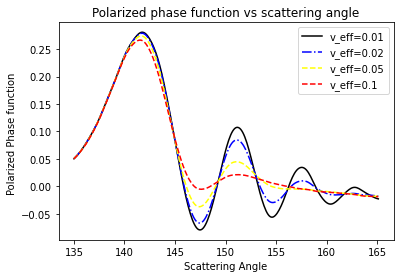

In [ ]:
ang_Mie,p11_wl_angles,p12_wl_angles,ssa_bulk_ave,wl_Mie, Qe_bulk_ave, S_wl_angles = Mie_test.bulk_average(r,n_r1)
print(Qe_bulk_ave.shape)
print('Qe_bulk_ave =', Qe_bulk_ave)
print('ssa_bulk_ave =', ssa_bulk_ave)
print('Lidar ratio =', S_wl_angles)


#print(p12_wl_angles[0,:])
fig,ax=plt.subplots()
ax.plot(ang_Mie[1350:1652],p12_wl_angles1[1,1350:1652],label="v_eff=0.01",color="black")
ax.plot(ang_Mie[1350:1652],p12_wl_angles2[1,1350:1652], '-.',label="v_eff=0.02",color="blue")
ax.plot(ang_Mie[1350:1652],p12_wl_angles3[1,1350:1652],"--",label="v_eff=0.05",color="yellow")
ax.plot(ang_Mie[1350:1652],p12_wl_angles4[1,1350:1652],"--",label="v_eff=0.1",color="red")
plt.legend()
#ax.set_xscale('log')
ax.set_xlabel('Scattering Angle')
ax.set_ylabel('Polarized Phase function ')
#ax.grid(True)
ax.set_title('Polarized phase function vs scattering angle',fontsize='large')

Text(0.5, 1.0, 'Polarized phase function vs scattering angle')

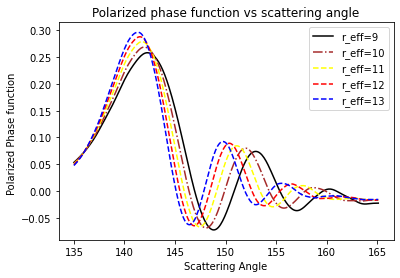

In [ ]:
#Third plot
ang_Mie,p12_wl_angles1,p12_wl_angles2,p12_wl_angles3,p12_wl_angles4,p12_wl_angles5,ssa_bulk_ave,wl_Mie=Mie_test.bulk_average(r,n_r)


#print(p12_wl_angles[0,:])
fig,ax=plt.subplots()
ax.plot(ang_Mie[1350:1652],p12_wl_angles1[1,1350:1652],label="r_eff=9",color="black")
ax.plot(ang_Mie[1350:1652],p12_wl_angles2[1,1350:1652], '-.',label="r_eff=10",color="brown")
ax.plot(ang_Mie[1350:1652],p12_wl_angles3[1,1350:1652],"--",label="r_eff=11",color="yellow")
ax.plot(ang_Mie[1350:1652],p12_wl_angles4[1,1350:1652],"--",label="r_eff=12",color="red")
ax.plot(ang_Mie[1350:1652],p12_wl_angles5[1,1350:1652],"--",label="r_eff=13",color="blue")
plt.legend()
#ax.set_xscale('log')
ax.set_xlabel('Scattering Angle')
ax.set_ylabel('Polarized Phase function ')
#ax.grid(True)
ax.set_title('Polarized phase function vs scattering angle',fontsize='large')

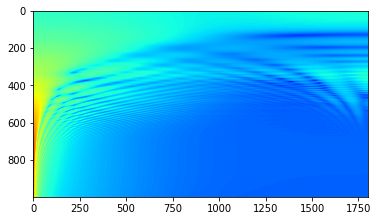

In [ ]:
fig,ax=plt.subplots()
ax.imshow(np.log10(Mie_test.P11[:,0,:]),cmap='jet')

In [ ]:
class lognormal_PSD():
  def __init__(self,r,rv,sigma,Cv):
    self.r=r
    self.rv=rv
    self.Cv=Cv
    self.sigma=sigma
    self.dV_dlnr = Cv/np.sqrt(2*np.pi)/sigma*np.exp(-(np.log(r)-np.log(rv))**2/2/sigma**2)
  def plot(self):
    fig,ax=plt.subplots()
    ax.plot(self.r,self.dV_dlnr)
    ax.set_xlabel(r'radius [$\mu m$]',fontsize='large')
    ax.set_ylabel(r'dV/dlnr [$\mu m^3/\mu m^2$]',fontsize='large')
    ax.set_xscale('log')




Text(0, 0.5, 'Extinction Efficiency $Q_e$')

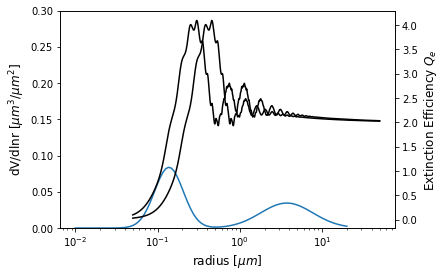

In [ ]:
r=np.logspace(-2,np.log10(20),100)
tau440=0.7
Dubovik_BB_fine=lognormal_PSD(r,0.12+0.025*tau440,0.4,0.12*tau440)
print (Dubovik_BB_fine)
Dubovik_BB_coarse=lognormal_PSD(r,3.22+0.71*tau440,0.73,0.09*tau440)
Dubovik_BB_combined=Dubovik_BB_fine.dV_dlnr+Dubovik_BB_coarse.dV_dlnr
fig,ax=plt.subplots()
ax.plot(Dubovik_BB_coarse.r,Dubovik_BB_combined)
ax.set_xlabel(r'radius [$\mu m$]',fontsize='large')
ax.set_ylabel(r'dV/dlnr [$\mu m^3/\mu m^2$]',fontsize='large')
ax.set_xscale('log')
ax.set_ylim([0,0.3])
axr=ax.twinx()
axr.plot(Mie_test.D/2,Mie_test.Qe,c='k')
axr.set_ylabel('Extinction Efficiency $Q_e$',fontsize='large')